In [1]:
import pickle
from pprint import pp


import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MaxNLocator

from collections import OrderedDict

In [2]:
def calc_remembering(acc_1: float, acc_2: float) -> float:
    """Rem = Acc_2 / Acc_1 -> this will yield a value between 0 and 1 (most likely)
       since Acc_2 is after trainging on a new task. If Greater than 1 than we have Backwards Transfer."""
    return acc_2/acc_1

def calc_forgetting(acc_1: float, acc_2: float) -> float:
    return acc_1/acc_2

def calc_forward_transfer(B_acc_0: float, B_acc_1: float) -> float:
    """FT = (B_acc_0 - B_acc_1)/ (B_acc_0 + B_acc_1)
        This will yield a value between -1 and 1. if the value is negative than thre was negative interference.
        if positive than forward transfer of information."""
    return (B_acc_0 - B_acc_1)/ (B_acc_0 + B_acc_1)

In [3]:
path_to_data = "/home/users/MTrappett/mtrl/BranchGatingProject/branchNetwork/data/results/demo_CL_metrics_results.pkl"

with open(path_to_data, 'rb') as f:
    data = pickle.load(f)

In [4]:
pp(data)

[{'model_name': 'BranchModel',
  'data': OrderedDict([('model_name', 'BranchModel'),
                       ('Training_Loss',
                        [0.7555934578394548,
                         0.3849744784910553,
                         0.32067404340464656,
                         0.2792726252726413,
                         0.2573161133231756,
                         0.22620176563720806,
                         0.21942917662639225,
                         0.20079297339785457,
                         0.19457329320014655,
                         0.1821492840703309,
                         0.7326433345580253,
                         0.44499808723648515,
                         0.37187622445293317,
                         0.3299389438199314,
                         0.2854234049447809,
                         0.28549955481664835,
                         0.27093948052077294,
                         0.24292700526381905,
                         0.2324248714922606,
         

In [5]:
def make_results_dict(results):
    results_dictionary = dict()
    for result in results:
        results_dictionary[result['model_name']] = result['data']
    # plot_results(results_dictionary)
    return results_dictionary
    
def make_plot(results_dictionary: dict[str, OrderedDict], subfig_labels: list, results_indices: list, title: str, save_str: str, yaxis_label: str='Loss'):
    fig, axs = plt.subplots(len(subfig_labels), 1, figsize=(10, 8), sharex=True, layout="constrained")
    colors ={model_name:color for model_name, color in zip(results_dictionary.keys(), ['blue', 'orange', 'green', 'red'])}
    
    for j, (i, ax) in enumerate(zip(results_indices, axs)):
        for results in results_dictionary.values():
            ax.plot(np.array(list(results.values())[i]), 
                    label=list(results.values())[0], 
                    color=colors[list(results.values())[0]], 
                    linewidth=2)
        
        # Removing the red rectangle by not adding it this time
        ax.grid(True)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
        # ax.set_yticks([0, 1]) 
        
        # Adding vertical bars
        half_of_data = len(list(results.values())[i])/2 - 0.5
        # print(half_of_data)
        ax.axvline(x=half_of_data, color='grey', linestyle='--', linewidth=2)
        # ax.axvline(x=2*half_of_data, color='grey', linestyle='--', linewidth=2)
        
        # Setting larger labels
        # ax.set_ylabel(yaxis_label, fontsize=14)

        # Placing larger, bold text aligned with each subplot on the y-axis
        fig.text(-.07, 0.5-(i*0.01), subfig_labels[j], fontsize=12, fontweight='bold',
                verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)

    # Setting the x-axis label only once, with a larger font size
    axs[-1].set_xlabel('Epochs', fontsize=14)

    # Adding a legend
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')

    # Adding an overall figure title, a bit larger
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    # plt.savefig(f'/home/users/MTrappett/mtrl/BranchGatingProject/data/plots/{save_str}.png', bbox_inches='tight')
      
      
      
def plot_results(results_dictionary: dict[str, OrderedDict]):
    '''results dictionary will have keys of model name and values of Ordereddict with element:
    ['model_name',
    'Training_Loss', 
    f'd{degrees[0]}_loss', 
    f'd{degrees[1]}_loss',
    f'd{degrees[0]}_Accuracy',
    f'd{degrees[1]}_Accuracy',]
    '''
    
    subfig_labels = ['Training Loss',
                    'Validation Loss for Task 1', 
                    'Validation Loss for Task 2',]
    results_indices = [1,2,4]
    make_plot(results_dictionary, subfig_labels, results_indices, 'Comparison of all losses during training and evaluation', 'loss_plot', 'Loss')
    
    subfig_labels = ['Training Loss',
                    'Validation Accuracy for Task 1', 
                    'Validation Accuracy for Task 2']
    results_indices = [1,3,5]
    make_plot(results_dictionary, subfig_labels, results_indices,'Comparison of evaluation accuracy after training', 'accuracy_plot', 'Accuracy')

In [6]:
data_dict = make_results_dict(data) 
print(len(data_dict.values()))

4


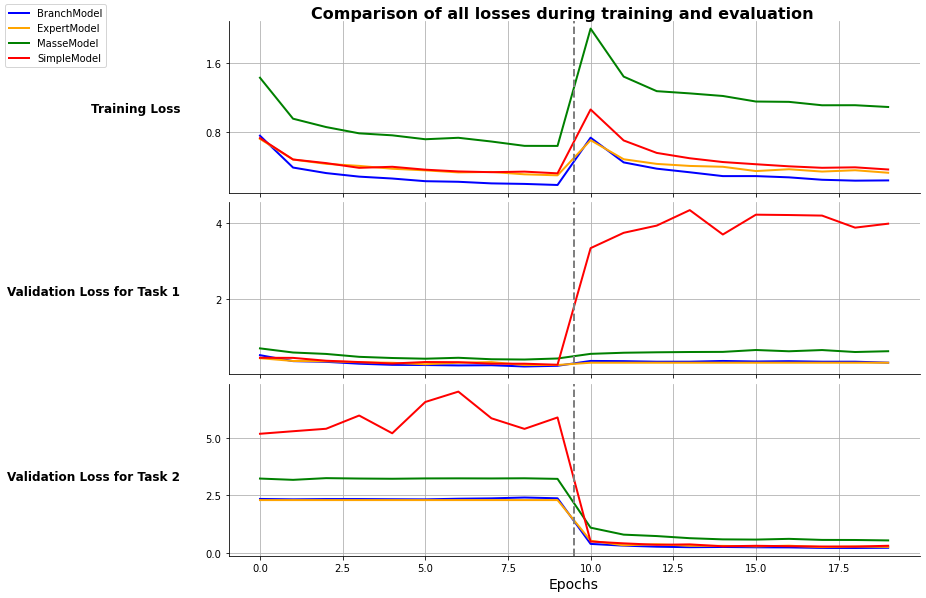

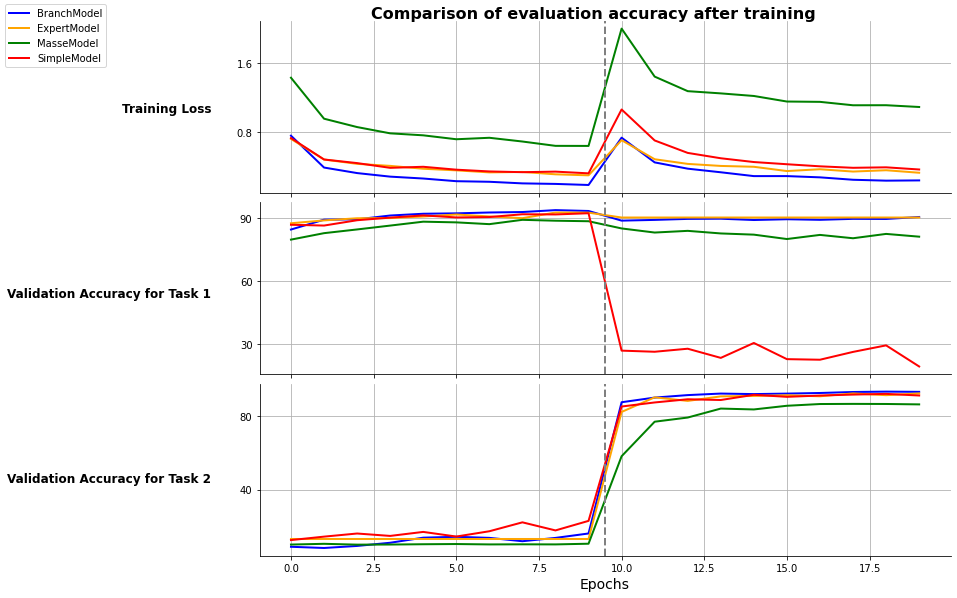

In [7]:
plot_results(data_dict)

In [8]:
print(data_dict.keys())

dict_keys(['BranchModel', 'ExpertModel', 'MasseModel', 'SimpleModel'])


In [9]:
expert_data = data_dict['ExpertModel']
gate_data = data_dict['BranchModel']

In [10]:
expert_data.keys()

expert_accuracys = {k:expert_data[k] for k in ('d0_Accuracy', 'd180_Accuracy')}
gate_accuracys = {k:gate_data[k] for k in ('d0_Accuracy', 'd180_Accuracy')}

In [11]:
expert_accuracys

{'d0_Accuracy': [87.53666666666666,
  88.9,
  89.925,
  90.01166666666667,
  90.75166666666667,
  91.70833333333333,
  90.8,
  89.96333333333334,
  92.65666666666667,
  92.595,
  90.27833333333334,
  90.27833333333334,
  90.27833333333334,
  90.27833333333334,
  90.27833333333334,
  90.27833333333334,
  90.27833333333334,
  90.27833333333334,
  90.27833333333334,
  90.27833333333334],
 'd180_Accuracy': [13.025,
  13.025,
  13.025,
  13.025,
  13.025,
  13.025,
  13.025,
  13.025,
  13.025,
  13.025,
  82.31333333333333,
  90.295,
  88.33666666666667,
  90.81333333333333,
  91.055,
  91.41833333333334,
  90.86833333333334,
  92.42333333333333,
  91.465,
  92.42]}

In [12]:
last_task_1_acc_index = int(len(gate_accuracys['d0_Accuracy'])/2) - 1
last_task_2_acc_index = len(gate_accuracys['d180_Accuracy']) - 1


In [13]:
forget_val = calc_forgetting(gate_accuracys['d0_Accuracy'][last_task_1_acc_index], gate_accuracys['d0_Accuracy'][last_task_2_acc_index])
remem_val = calc_remembering(gate_accuracys['d0_Accuracy'][last_task_1_acc_index], gate_accuracys['d0_Accuracy'][last_task_2_acc_index])
forward_val = calc_forward_transfer(gate_accuracys['d180_Accuracy'][last_task_2_acc_index], expert_accuracys['d180_Accuracy'][last_task_2_acc_index])

In [14]:
pp(gate_accuracys)
pp(expert_accuracys)

{'d0_Accuracy': [84.54,
                 89.25333333333333,
                 89.41166666666666,
                 91.23166666666667,
                 92.075,
                 92.265,
                 92.675,
                 92.89833333333333,
                 93.80833333333334,
                 93.4,
                 88.79166666666667,
                 89.14,
                 89.62166666666667,
                 89.705,
                 89.08333333333333,
                 89.455,
                 89.17666666666666,
                 89.64,
                 89.59,
                 90.53166666666667],
 'd180_Accuracy': [8.77,
                   8.115,
                   9.228333333333333,
                   10.966666666666667,
                   13.738333333333333,
                   14.216666666666667,
                   13.633333333333333,
                   11.805,
                   13.611666666666666,
                   16.023333333333333,
                   87.62,
                   

In [15]:
print(f'Forgetting: {forget_val}')
print(f'Remembering: {remem_val}')
print(f'Forward Transfer: {forward_val}')

Forgetting: 1.031683204771811
Remembering: 0.9692897930049964
Forward Transfer: 0.004640058875795396
